<a href="https://colab.research.google.com/github/dubeyabhi07/hands-on-scikit-learn/blob/master/dimensionalityReduction/basicPCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
# read in the iris data
cancer = load_breast_cancer()

In [ ]:
print(len(cancer.data))
print(len(cancer.data[cancer.target==1]))
print(len(cancer.data[cancer.target==0])) 


569
357
212


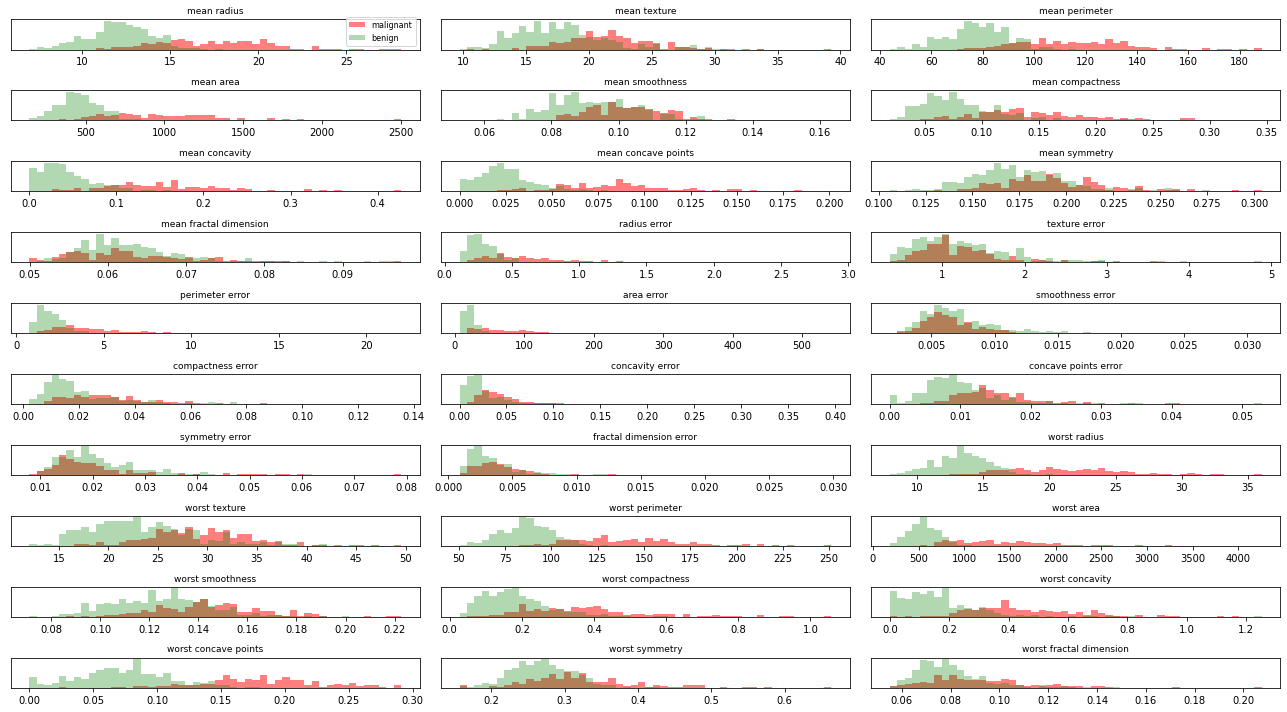

In [ ]:
import numpy as np
fig,axes =plt.subplots(10,3, figsize=(18, 10)) # 3 columns each containing 10 figures, total 30 features
malignant=cancer.data[cancer.target==0] # define malignant
benign=cancer.data[cancer.target==1] # define benign
ax=axes.ravel()# flat axes with numpy ravel
for i in range(30):
  _,bins=np.histogram(cancer.data[:,i],bins=50)
  ax[i].hist(malignant[:,i],bins=bins,color='r',alpha=.5)# red color for malignant class
  ax[i].hist(benign[:,i],bins=bins,color='g',alpha=0.3)# alpha is for transparency in the overlapped region 
  ax[i].set_title(cancer.feature_names[i],fontsize=9)
  ax[i].set_yticks(())
ax[0].legend(['malignant','benign'],loc='best',fontsize=8)
plt.tight_layout()# let's make good plots
plt.show()

In [ ]:
import pandas as pd
cancer_df=pd.DataFrame(cancer.data,columns=cancer.feature_names) # just convert the scikit learn data-set to pandas data-frame.
cancer_df.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


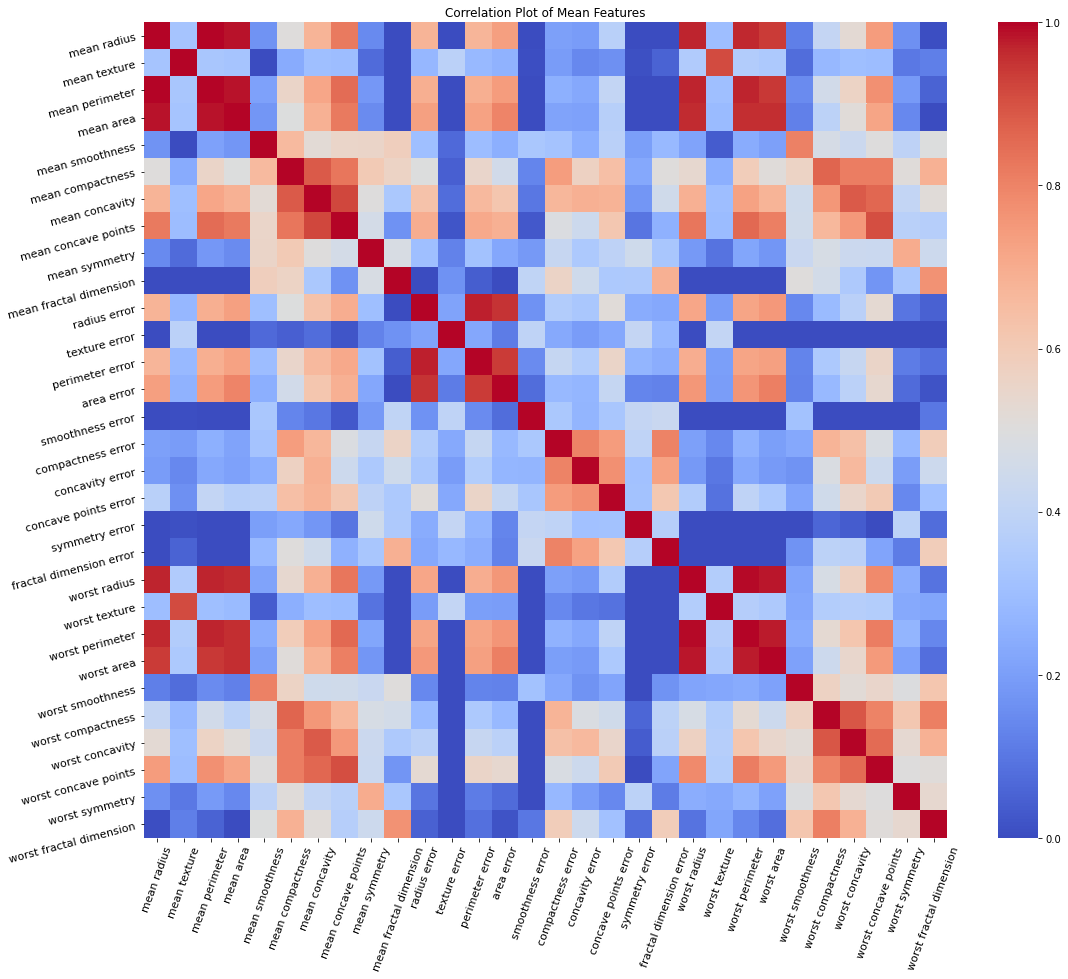

In [ ]:
import seaborn as sns;
mean_corr = cancer_df[list(cancer_df)].corr() # TRICKY
fig=plt.figure(figsize=(18,15))
g1 = sns.heatmap(mean_corr, cmap='coolwarm', vmin=0, vmax=1)
g1.set_xticklabels(g1.get_xticklabels(), rotation=70, fontsize=11)
g1.set_yticklabels(g1.get_yticklabels(), rotation=15, fontsize=11)
plt.title("Correlation Plot of Mean Features")
plt.show()

Clearly Some features are very much related. For example `mean radius` is has high co variance with `mean area` and `worst area` but not with `texture error` and `symmetry error`

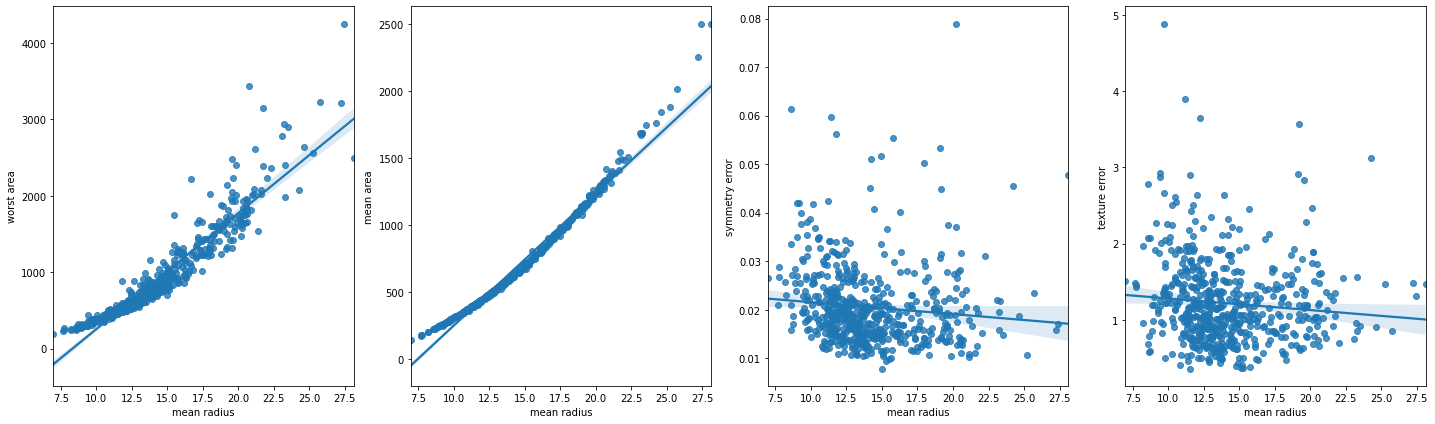

In [ ]:
fig, axs = plt.subplots(ncols=4,figsize=(20, 6))
sns.regplot(x='mean radius', y='worst area', data=cancer_df, ax=axs[0])
sns.regplot(x='mean radius', y='mean area', data=cancer_df, ax=axs[1])
sns.regplot(x='mean radius', y='symmetry error', data=cancer_df, ax=axs[2])
sns.regplot(x='mean radius', y='texture error', data=cancer_df, ax=axs[3])
plt.tight_layout()

- PCA is essentially a method that reduces the dimension of the feature space in such a way that new variables are orthogonal to each other (i.e. they are independent or not correlated). 

- From the cancer data-set we see that it has 30 features, so let’s reduce it to only 3 principal features and then we can visualize the scatter plot of these new independent variables.

- Before applying PCA, we scale our data such that each feature has unit variance. This is necessary because fitting algorithms highly depend on the scaling of the features. Here we use the StandardScalermodule for scaling the features individually. StandardScalersubtracts the mean from each features and then scale to unit variance.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(cancer.data) # compute the mean and standard which will be used in the next command
X_scaled=scaler.transform(cancer.data)
# we can check the minimum and maximum of the scaled features which we expect to be 0 and 1
print("after scaling minimum", X_scaled.min(axis=0)) 

after scaling minimum [-2.0296483  -2.22924851 -1.98450403 -1.45444309 -3.11208479 -1.61013634
 -1.11487284 -1.26181958 -2.74411707 -1.81986478 -1.05992413 -1.55426392
 -1.04404888 -0.73782907 -1.77606498 -1.2980982  -1.05750068 -1.91344745
 -1.53289003 -1.09696818 -1.72690052 -2.22399401 -1.69336103 -1.22242284
 -2.68269492 -1.4438784  -1.30583065 -1.74506282 -2.16095969 -1.60183949]


In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=3) 
pca.fit(X_scaled) 
X_pca=pca.transform(X_scaled) 
#let's check the shape of X_pca array
print(X_pca)

[[ 9.19283683  1.94858308 -1.12316636]
 [ 2.3878018  -3.76817184 -0.52928865]
 [ 5.73389628 -1.07517382 -0.55174676]
 ...
 [ 1.25617928 -1.90229669  0.56272964]
 [10.37479406  1.6720102  -1.87703307]
 [-5.4752433  -0.67063677  1.49044211]]


In [ ]:
variance=np.var(X_pca,axis=0)
variance_ratio = variance/np.sum(variance)
print(variance_ratio) 

print(pca.explained_variance_ratio_)

[0.60950217 0.2611802  0.12931763]
[0.44272026 0.18971182 0.09393163]


- Principal axis 1 explains 44% of variance while axis 2 explains 18%
- So it’s good enough to choose only 2 components if capturing only 60% of variance is required.
- Now, since the PCA components are orthogonal to each other and they are not correlated, we can expect to see malignant and benign classes as distinct. Let’s plot the malignant and benign classes based on the first two principal components.

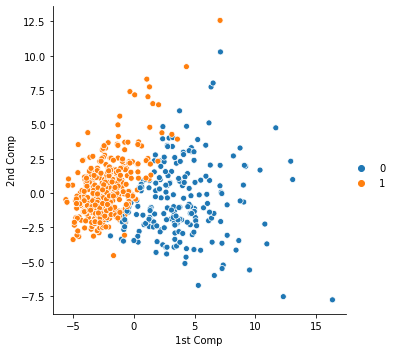

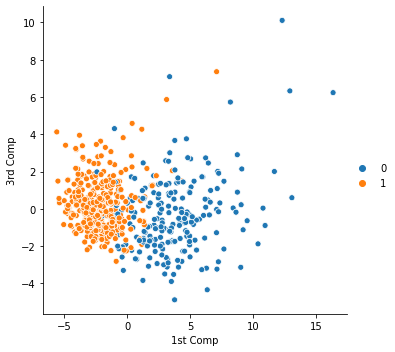

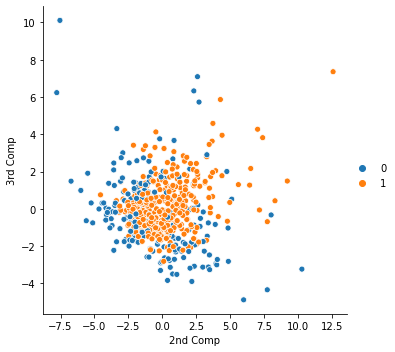

In [ ]:
pca_df = pd.DataFrame(X_pca, columns=['1st Comp', '2nd Comp','3rd Comp'])
pca_df.head(5)
sns.relplot(x='1st Comp', y='2nd Comp', data=pca_df,hue=cancer.target)
sns.relplot(x='1st Comp', y='3rd Comp', data=pca_df,hue=cancer.target)
sns.relplot(x='2nd Comp', y='3rd Comp', data=pca_df, hue=cancer.target)

- It’s difficult to interpret the two axes as they are some complex mixture of the original features. 
- Still, we can make a heat-plot to see how the features mixed up to create the components.

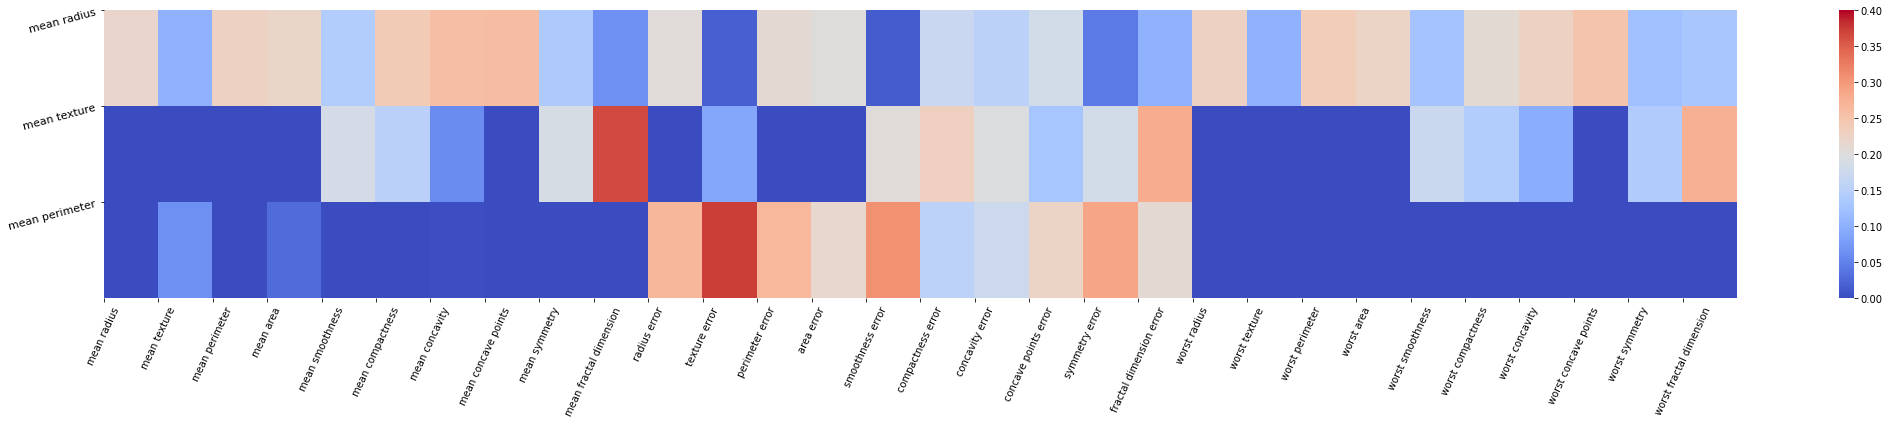

In [ ]:
fig=plt.figure(figsize=(30,6))
g2 = sns.heatmap(pca.components_, cmap='coolwarm', vmin=0, vmax=0.4)
plt.yticks([0,1,2],['1st Comp','2nd Comp','3rd Comp'],fontsize=10)
g2.set_yticklabels(g1.get_yticklabels(), rotation=15, fontsize=11)
plt.xticks(range(len(cancer.feature_names)),cancer.feature_names,rotation=65)
plt.tight_layout()
plt.show()

# PCA Parameters :
- If 0 < n_components < 1 and svd_solver == 'full', select the number of components such that the amount of variance that needs to be explained is greater than the percentage specified by n_components.
- If n_components == 'mle' and svd_solver == 'full', Minka’s MLE is used to guess the dimension. Use of n_components == 'mle' will interpret svd_solver == 'auto' as svd_solver == 'full'.


In [ ]:
pca2 = PCA(n_components=0.8)
pca3 = PCA(n_components="mle")
pca2.fit(X_scaled)
pca3.fit(X_scaled)
X_pca2 = pca2.transform(X_scaled)
X_pca3 = pca3.transform(X_scaled)

print(X_pca2)
print("-------------------------------------------------------------------")
print(X_pca3)

[[ 9.19283683  1.94858307 -1.12316616  3.6337309  -1.19511012]
 [ 2.3878018  -3.76817174 -0.52929269  1.11826386  0.62177498]
 [ 5.73389628 -1.0751738  -0.55174759  0.91208267 -0.1770859 ]
 ...
 [ 1.25617928 -1.90229671  0.56273053 -2.08922702  1.80999133]
 [10.37479406  1.67201011 -1.87702933 -2.35603113 -0.03374193]
 [-5.4752433  -0.67063679  1.49044308 -2.29915714 -0.18470331]]
-------------------------------------------------------------------
[[ 9.19283683e+00  1.94858307e+00 -1.12316616e+00 ... -2.52584993e-01
  -3.39144536e-02  4.56477199e-02]
 [ 2.38780180e+00 -3.76817174e+00 -5.29292687e-01 ...  1.81270166e-01
   3.26241827e-02 -5.68742432e-03]
 [ 5.73389628e+00 -1.07517380e+00 -5.51747593e-01 ...  4.95694331e-02
   4.70258247e-02  3.14589659e-03]
 ...
 [ 1.25617928e+00 -1.90229671e+00  5.62730526e-01 ... -2.36914565e-02
  -2.57775589e-03  6.70621179e-03]
 [ 1.03747941e+01  1.67201011e+00 -1.87702933e+00 ... -2.74094161e-02
  -6.80863833e-02 -8.41632764e-02]
 [-5.47524330e+00 